In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# definimos carpeta donde se encuentran los archivos
dir = "data_scoring"

# importamos los archivos de scoring según método
dfs=[]
nombre_archivo=[]
for filename in os.listdir(dir):
    if filename.endswith(".txt"):  
        file_path = os.path.join(dir, filename)
        df = pd.read_csv(file_path, delimiter="\t")
        dfs.append(df)
        nombre_archivo.append(filename)

In [5]:
nombre_archivo

['tb_future_prediccion_ev01_sc04.txt',
 'tb_future_prediccion_ev02_sc05.txt',
 'tb_future_prediccion_ev03_sc06.txt',
 'tb_future_prediccion_ev04_sc07.txt',
 'tb_future_prediccion_ev05_sc08.txt',
 'tb_future_prediccion_ev07_sc10.txt',
 'tb_future_prediccion_ev12_sc15.txt',
 'tb_future_prediccion_ev13_sc16.txt']

In [6]:
# campo de score por semilla
campos_m = ['m_1_1', 'm_1_2', 'm_1_3', 'm_1_4', 'm_1_5', 'm_1_6', 'm_1_7', 'm_1_8', 'm_1_9', 'm_1_10']
prefijos = ['Ninguno', 'Rank simple', 'Rank cero fijo', 'Deflación', 'Estandarizar', 'UVA', 'Dólar Blue', 'Dólar Oficial Minorista']
prefijos_2 = ['ninguno', 'rank_simple', 'rank_cero_fijo', 'deflacion', 'estandarizar', 'uva', 'dolar_blue', 'dolar_oficial_minorista']

# defino dataset
df0=dfs[0]
prefijos_2_0 = prefijos_2[0]

# calculo score medio con todas las semillas
df0["scoring_medio"] = df0[campos_m].mean(axis=1)

# ordeno por campo "scoring_medio"
df0 = df0.sort_values("scoring_medio", ascending=False).reset_index(drop=True)

# funcion ganancia
df0['ganancia_acum'] = np.cumsum(
        np.where(df0["clase_ternaria"].isin(["BAJA+2"]), 117000, -3000)
    )


df0 = df0.reset_index(drop=False)
df0["index"] = df0["index"]+1
df0 = df0.rename(columns={"index":"Envio","ganancia_acum":f"ganancia_acum_{prefijos_2_0}"})
df0 = df0[["Envio",f"ganancia_acum_{prefijos_2_0}"]]
df0

,Envio,ganancia_acum_ninguno
0,1,-3000
1,2,-6000
2,3,-9000
3,4,-12000
4,5,-15000
...,...,...
164591,164592,-344016000
164592,164593,-344019000
164593,164594,-344022000
164594,164595,-344025000


In [7]:
# para cada metodo calculo la ganancia del "semillero"
dfs_ganancias_semillero = []
for i in range(0,8):
    # defino dataset 
    df = dfs[i]
    prefijo = prefijos_2[i]
    
    # calculo score medio con todas las semillas
    df["scoring_medio"] = df[campos_m].mean(axis=1)

    # ordeno por campo "scoring_medio"
    df = df.sort_values("scoring_medio", ascending=False).reset_index(drop=True)

    # funcion ganancia
    df['ganancia_acum'] = np.cumsum(
            np.where(df["clase_ternaria"].isin(["BAJA+2"]), 117000, -3000)
        )


    df = df.reset_index(drop=False)
    df["index"] = df["index"]+1
    df = df.rename(columns={"index":"envios","ganancia_acum":f"ganancia_acum_{prefijo}"})
    df = df[["envios",f"ganancia_acum_{prefijo}"]]
    dfs_ganancias_semillero.append(df)
    

In [11]:
# Combinar los DataFrames usando merge de forma iterativa
df_ganancias_semillero_combinado = dfs_ganancias_semillero[0]
for df in dfs_ganancias_semillero[1:]:
    df_ganancias_semillero_combinado = df_ganancias_semillero_combinado.merge(df, on='envios')

#guardar para notebook 'ganancia_exp_dr.ipynb'
#df_ganancias_semillero_combinado.to_csv("data_ganancias_semillero/ganancias_semillero_dr.csv", index=False)

In [9]:
df_ganancias_semillero_combinado

,envios,ganancia_acum_ninguno,ganancia_acum_rank_simple,ganancia_acum_rank_cero_fijo,ganancia_acum_deflacion,ganancia_acum_estandarizar,ganancia_acum_uva,ganancia_acum_dolar_blue,ganancia_acum_dolar_oficial_minorista
0,1,-3000,-3000,-3000,-3000,-3000,-3000,-3000,-3000
1,2,-6000,-6000,-6000,-6000,-6000,-6000,-6000,-6000
2,3,-9000,-9000,-9000,-9000,-9000,-9000,-9000,-9000
3,4,-12000,-12000,-12000,-12000,-12000,-12000,-12000,-12000
4,5,-15000,-15000,-15000,-15000,-15000,-15000,-15000,-15000
...,...,...,...,...,...,...,...,...,...
164591,164592,-344016000,-344016000,-344016000,-344016000,-344016000,-344016000,-344016000,-344016000
164592,164593,-344019000,-344019000,-344019000,-344019000,-344019000,-344019000,-344019000,-344019000
164593,164594,-344022000,-344022000,-344022000,-344022000,-344022000,-344022000,-344022000,-344022000
164594,164595,-344025000,-344025000,-344025000,-344025000,-344025000,-344025000,-344025000,-344025000


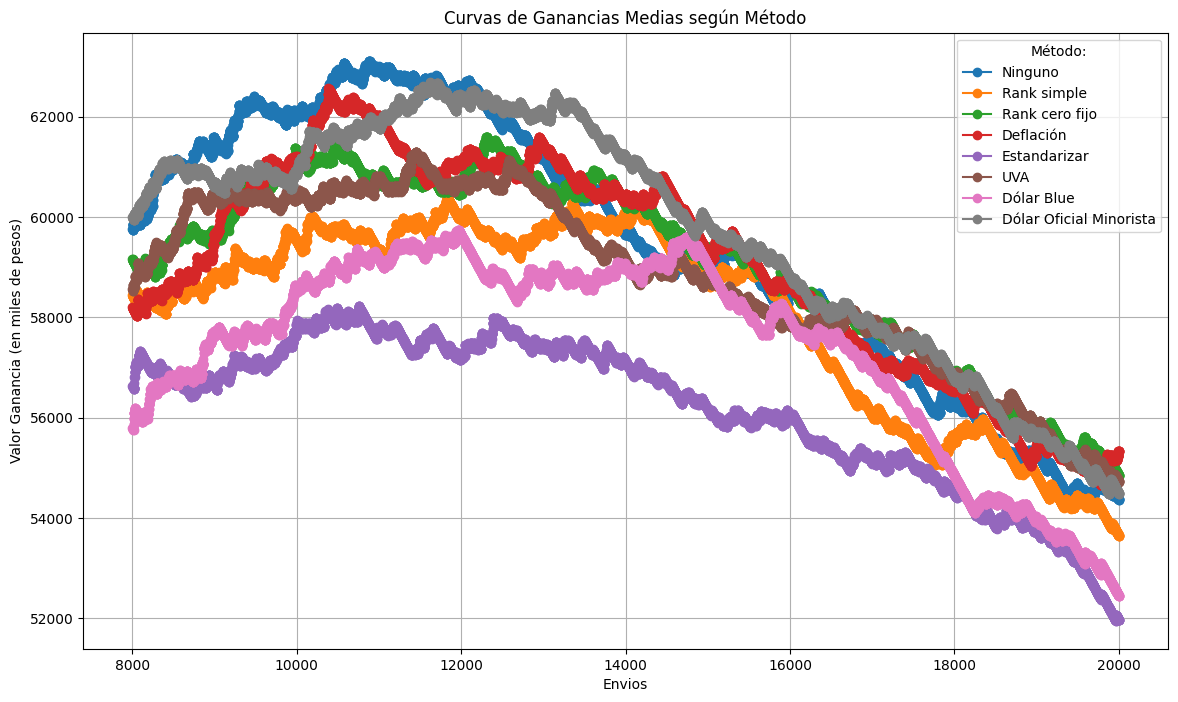

In [10]:
# Graficar los datos
plt.figure(figsize=(14, 8))
df_ganancias_semillero_combinado = df_ganancias_semillero_combinado[(df_ganancias_semillero_combinado['envios']>8000) & (df_ganancias_semillero_combinado['envios']<20000)]
for i,column in enumerate(df_ganancias_semillero_combinado.columns[1:]):
    plt.plot(df_ganancias_semillero_combinado['envios'], df_ganancias_semillero_combinado[column]/1000, marker='o', label=prefijos[i])

plt.xlabel('Envios')
plt.ylabel('Valor Ganancia (en miles de pesos)')
plt.title('Curvas de Ganancias Medias según Método')
plt.legend(title="Método:")
plt.grid(True)
plt.show()